In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print(X.shape, y.shape)

(150, 4) (150,)


In [4]:
# y = y.reshape((150,1))
# X[:,0]

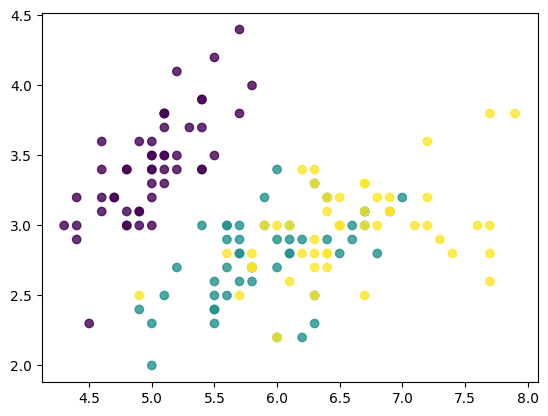

In [5]:
plt.scatter(X[:,0], X[:,1],c=y, alpha=0.8)

In [6]:
# on va diviser les données en train et test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=5)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)


(120, 4) (120,)
(30, 4) (30,)


Text(0.5, 1.0, 'Test set')

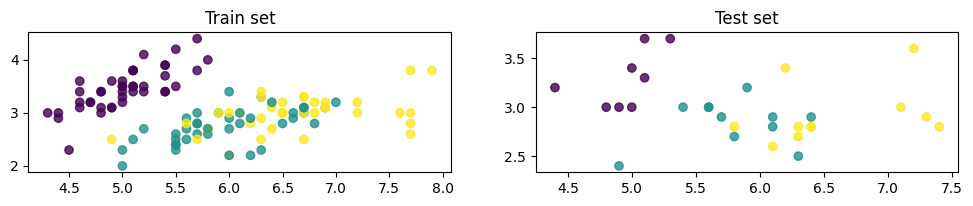

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(221)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')

plt.subplot(222)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [8]:
# importation du modèle KNeighborsClassifier(), les k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=6) # définir le nombre de voisins 

# Train my model for train data
model.fit(X_train, y_train)
print("Train Score", model.score(X_train, y_train))
print("Test Score", model.score(X_test, y_test))



Train Score 0.9833333333333333
Test Score 0.9666666666666667


## Validation Test (hypers parametres)

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring='accuracy') # metrique accuracy

array([1.        , 1.        , 0.95833333, 0.95833333, 0.95833333])

In [12]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

on obtient 5 Scores, on peut donc faire la moyenne

on peut changer le nombre de neignbors pour voir quelle est le plus grand score avec une boucle for et en enregsitrant le score dans une liste

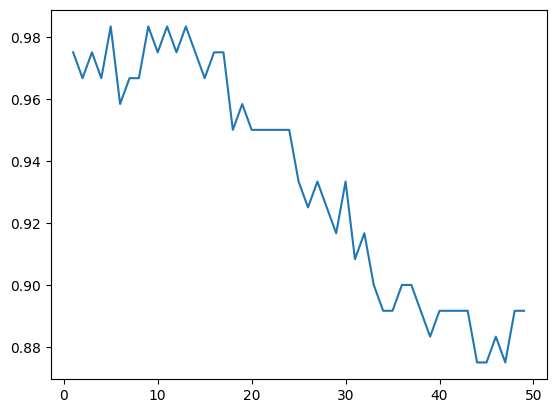

In [13]:
val_score= []

for i in range(1,50):
    score = cross_val_score(KNeighborsClassifier(i), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)

# Afficher les scores dans une figure
plt.plot(range(1,50), val_score)

Mais in n'a pas besoin de faire cette boucle for, il existe une fonction dans Sklearn qui permet de la faire
## Validation Curve

In [14]:
from sklearn.model_selection import validation_curve
# test toutes les valeurs pour un hyperparametres donné, calcul le score sur train set et Val set grace à cross validation
# exemple pour 49 valeurs sont testés avec cv =5, alors train set et val set dimension (49,5)


In [15]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k,cv=5)

val_score.mean(axis=1) # moyenne de chaque cross validation , de chaque ligne ,axis = 1 cad ligne

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.93333333,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

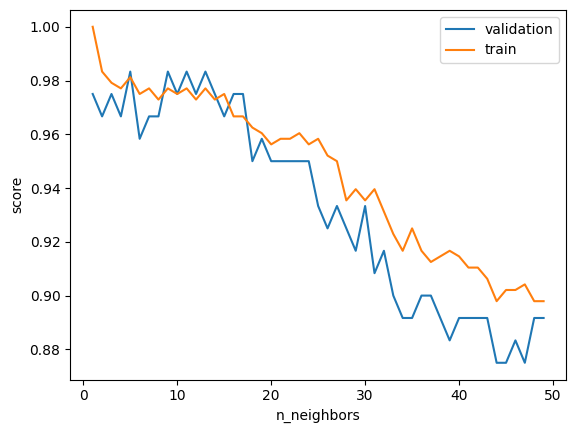

In [16]:
plt.plot(k, val_score.mean(axis=1), label='validation') # 49 elements = scores ou validation set
plt.plot(k, train_score.mean(axis=1), label='train') # 49 elements = scores ou train set

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()


Schéma très utile pour trouver l'overfiting(surapprentissage):
la modèl c'est trop perfectionné sur les données train et a perdu tout sens de généralisation

# GridSearchCV
il existe d'autres parametres autre que le nombre dee voisins pour notre cas, tel que 
le type de distance utilisé (Euclidienne ou manhattan), ou les coéfficients sur nos, ce qui permet d'ameliorer le score du modèl d'ou l'utilisation de GridSeachCV


In [17]:
# GridSearchCv permet de constriure une grille de modèles avec toutes les combinaisons d'hyperparametres présent dans paral_grid
from sklearn.model_selection import GridSearchCV

In [18]:
# créer un dictionnaire qui contient les differents hyperparam à regler
param_grid = {
    'n_neighbors':np.arange(1,20),
    'metric': ['euclidean','manhattan']
    }

In [19]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=5)
# la grille est un estimateur  (best_score, best_params, best_estimator)

grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
print("The best Score",grid.best_score_)
print("The best params",grid.best_params_)


The best Score 0.9833333333333334
The best params {'metric': 'euclidean', 'n_neighbors': 5}


In [21]:
best_model = grid.best_estimator_
# tester le meuilleur model sur les données de test 
best_model.score(X_test, y_test)


0.9333333333333333

## CONFUSION MATRIX
pour évaluer la qualité de notre modèle de classification, on peut utiliser la matrix de confusion, qui montrent les erreurs de classement

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_test, best_model.predict(X_test))
# les lignes diagonaux sont les predictions correctes, on a une matrice 3*3 car on a 3 classes de fleurs dans le dataset

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

on remarque : classe 1 --> 8 predictions correctes
            classe 2 -- 9 predictions correctes et 2 non correctes 

### Question : notre modèle serait performant si on lui donner plus de données --> reponse faire une courbe d'apprentissage (learning_curve)
elles montrent l'evolution des  performances en fonction de la quantités de données

In [25]:
from sklearn.model_selection import learning_curve 

In [31]:
# N represente le nombre de lot de notre dataset 
N, train_score, val_score = learning_curve(best_model, X_train, y_train, train_sizes= np.linspace(0.2,1.0,10), cv=5)
# np.linspace(0.2,1.0,5)
N

array([19, 27, 36, 44, 53, 61, 70, 78, 87, 96])

[19 27 36 44 53 61 70 78 87 96]


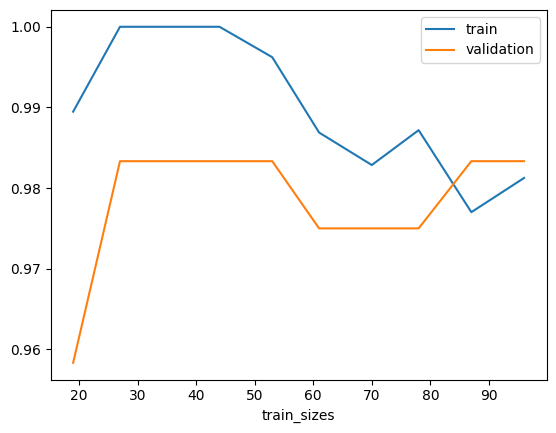

In [32]:
print(N)
plt.plot(N, train_score.mean(axis=1),label='train')
plt.plot(N, val_score.mean(axis=1),label='validation')
plt.xlabel("train_sizes")
plt.legend()